# Clustering Homework Assignment
#### By Christopher Vieira
This notebook focuses on clustering data we read in the previous assignment. This uses example data we have been using for our nanomechanical (clustering) mapping proejct and should walk you through the steps to get to the point where you have visualized the raw data and clsutered it. Being familiar with this work will mean that you should be fairly familiar with all of the work we will do in the backend for the nanomechanical (clustering) mapping project.   A Summary of tasks are below.

* Plotting a contour plot of the raw data
* Clustering the data using K Means
* Plotting a contour plot of the clustered data
* Plotting a histogram of the fractions of data in each cluster

This notebook also includes my solution to the previous assignment, feel free to use this or use your own, which ever is easiest.

### Imports Section
This is the section where you should store all of yoru imports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import interpolate
from sklearn.cluster import KMeans

### Variables and Constants
This is the section Setting up any variables or constants used throughout the program. This is where you'll want to set things like the filename and any constants you use.

In [2]:
file_path = "../data/01NOV2019_600degF-5min-Austempering_BCS-1444_small.xlsx"
sheet_name = "Test 1"
use_cols = "A:C"
hard_col_name = "HARDNESS"
x_col_name = "X Position"
y_col_name = "Y Position"
NUM_HIST_BINS = 200
nulls = False

### Excel File Reading
Reading the excel file and then the specific sheet we are using into a DataFrame.

Look at the document below for hints on how you should get your DataFrame. Both are valid ways to do this.

    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.ExcelFile.parse.html
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [3]:
xls = pd.ExcelFile(file_path)

if nulls:
    test1_sheet = pd.read_excel(xls, sheet_name, usecols=use_cols).iloc[:-1]
else:
    test1_sheet = pd.read_excel(xls, sheet_name, usecols=use_cols).dropna()

print(test1_sheet)

D:\anaconda3\envs\ZeroPointEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


      X Position  Y Position   HARDNESS
0       0.000000  247.459500  10.475490
1       0.000000  244.983000   9.790984
2       0.000000  242.458875  11.016381
3       0.000000  239.982375  10.806190
4       0.000000  237.458250   9.795248
...          ...         ...        ...
9995  247.507125    9.953625  11.386159
9996  247.507125    7.477125   9.431331
9997  247.507125    4.953000   7.512587
9998  247.507125    2.476500   8.060126
9999  247.507125    0.000000  11.429229

[10000 rows x 3 columns]


### Organizing Data and Making it Numeric
Put all of the data into separate DataFrames, converting them to numeric values.

    https://www.codegrepper.com/code-examples/python/create+new+dataframe+with+columns+from+another+dataframe+pandas

In [4]:
# If skip_first_row then read every row after the first, otherwise read them all
# The hardness values
hardness_column = test1_sheet[hard_col_name]
# The x values
x_column = test1_sheet[x_col_name]
# The y values
y_column = test1_sheet[y_col_name]
# The stiffness column
# Asserts that the columns have values
assert hardness_column is not None
assert x_column is not None
assert y_column is not None

hard_df = pd.DataFrame(hardness_column)
x_df = pd.DataFrame(x_column)
y_df = pd.DataFrame(y_column)

# Renames columns of all read data for consistency
hard_df = hard_df.rename(columns={hard_col_name: "Data"})
x_df = x_df.rename(columns={x_col_name: "Data"})
y_df = y_df.rename(columns={y_col_name: "Data"})

# Makes all read data numeric
hard_df["Data"] = pd.to_numeric(hard_df["Data"], downcast="float")
x_df["Data"] = pd.to_numeric(x_df["Data"], downcast="float")
y_df["Data"] = pd.to_numeric(y_df["Data"], downcast="float")
print("\nBelow are the hardness values... ")
print(hard_df)
print("\nBelow are the x values... ")
print(x_df)
print("\nBelow are the y values... ")
print(y_df)


Below are the hardness values... 
           Data
0     10.475491
1      9.790984
2     11.016380
3     10.806190
4      9.795248
...         ...
9995  11.386159
9996   9.431332
9997   7.512587
9998   8.060125
9999  11.429229

[10000 rows x 1 columns]

Below are the x values... 
            Data
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
...          ...
9995  247.507126
9996  247.507126
9997  247.507126
9998  247.507126
9999  247.507126

[10000 rows x 1 columns]

Below are the y values... 
            Data
0     247.459503
1     244.983002
2     242.458878
3     239.982376
4     237.458252
...          ...
9995    9.953625
9996    7.477125
9997    4.953000
9998    2.476500
9999    0.000000

[10000 rows x 1 columns]


### Data Visualization Before Cleaning
Plot all of the data we have gathered so far using histograms and matplotlib.pyplot. This should result in a uniform distribution for the x and y values while the hardness values have a bimodal distribution.

    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
    https://www.geeksforgeeks.org/pyplot-in-matplotlib/
    

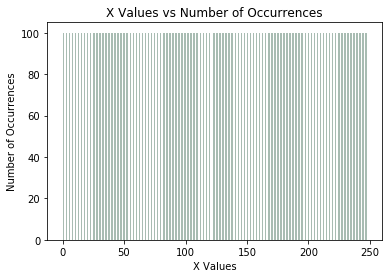

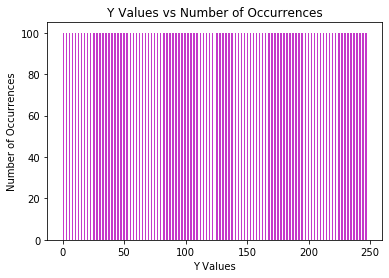

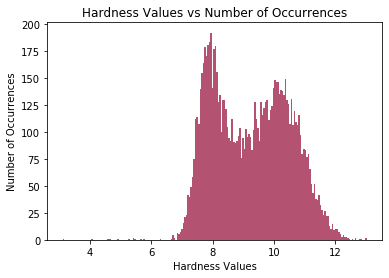

In [5]:
r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(x_df["Data"].values, bins=NUM_HIST_BINS, color=color)  # "darkgoldenrod"
plt.title("X Values vs Number of Occurrences")
plt.xlabel("X Values")
plt.ylabel("Number of Occurrences")
plt.show()

r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(y_df["Data"].values, bins=NUM_HIST_BINS, color=color)  # "forestgreen"
plt.title("Y Values vs Number of Occurrences")
plt.xlabel("Y Values")
plt.ylabel("Number of Occurrences")
plt.show()

r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(hard_df["Data"].values, bins=NUM_HIST_BINS, color=color)  # "darkred"
plt.title("Hardness Values vs Number of Occurrences")
plt.xlabel("Hardness Values")
plt.ylabel("Number of Occurrences")
plt.show()

### Data Clean - Setting Nulls
In this step we are going to try to identify outliers. We will then set those outliers to be null in order for them to be corrected in a later step. We are going to see if a point is an outlier based on it being 3 Z-score or more away from the mean.

    https://www.edureka.co/community/46045/python-pandas-print-all-values-greater-than-zero-dataframe
    https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe
    

In [6]:
array = hard_df.copy()["Data"].values

# Remove outliers
mean_val = np.mean(array)
stddev_val = np.std(array)
z_scores = 3
# print("Mean value is " + str(mean_val))
# print("Stddev value is " + str(stddev_val))
array[abs(array - mean_val) > stddev_val * z_scores] = np.nan

### Data Clean - Interpolating
Interpolate the data based on the surrounding neighbors. We will be using the scipy interpolate library for this. We are able to interpolate using two methods, cubic and nearest. Cubic is the most accurate form of interpolating from the neighbors but requires a most of the surrounding neighbors of a point to not be null. This means that it will not interpolate every point and nulls will remain. Once the cubic method has been run, we can run the nearest method. This will fill all nulls but in a less accurate way, making them based off of the nearest neighbor (which is arbitrary in a grid format). After these two steps, all of the data will be not null. 

There are three plots which are shown below using the plt.imshow() method and then plt.show() immediately after. You'll see that some cells are white in the first image. These are null values that need to be corrected. You can see they have dissapeared by the end of the process.

    https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
    https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
    https://scipython.com/book/chapter-8-scipy/examples/two-dimensional-interpolation-with-scipyinterpolategriddata/
    https://www.programcreek.com/python/example/106316/scipy.interpolate.griddata
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

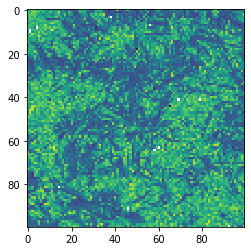


x
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

y
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

xx
[[ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 ...
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]]

yy
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]

x1
[ 0  1  2 ... 97 98 99]

y1
[ 0  0  0 ... 99 99 99]

array

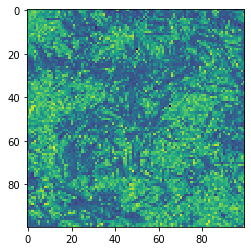

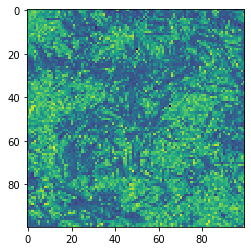

In [7]:
array = array.reshape(len(np.unique(x_df)), len(np.unique(y_df)))

plt.imshow(array)
plt.show()

x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
# mask invalid values
array = np.ma.masked_invalid(array)
xx, yy = np.meshgrid(x, y)
# get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

grid1 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')

print("\nx")
print(x)
print("\ny")
print(y)
print("\nxx")
print(xx)
print("\nyy")
print(yy)
print("\nx1")
print(x1)
print("\ny1")
print(y1)
print("\narray")
print(array)
print("\nnewarr")
print(newarr)
print("\nnewarr.ravel")
print(newarr.ravel())
print("\ngrid1")
print(grid1)
print("\n(x1, y1)")
print((x1, y1))
print("\n(xx, yy)")
print((xx, yy))

# print(grid1)
plt.imshow(grid1, interpolation='nearest')
plt.show()

x = np.arange(0, grid1.shape[1])
y = np.arange(0, grid1.shape[0])
# mask invalid values
grid1 = np.ma.masked_invalid(grid1)
xx, yy = np.meshgrid(x, y)
# get only the valid values
x1 = xx[~grid1.mask]
y1 = yy[~grid1.mask]
newarr = grid1[~grid1.mask]

grid2 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

# print(grid2)
plt.imshow(grid2, interpolation='nearest')
plt.show()

input_data = grid2.reshape(-1, 1)

hard_df = pd.DataFrame(input_data, columns=["Data"])

### Data Visualization After Cleaning
Plot the corrected hardness values after the cleaning process has been complete. This should be done using the same code as the visualization before cleaning and should show a plot with no outliers. 

    See resources used earlier for other plotting.

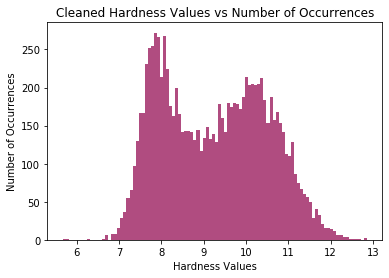

In [8]:
r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(hard_df["Data"].values, bins=100, color=color)  # "darkred"
plt.title("Cleaned Hardness Values vs Number of Occurrences")
plt.xlabel("Hardness Values")
plt.ylabel("Number of Occurrences")
plt.show()

### Visualizing Raw Data Contour Plot

In this step we are creating a contour plot based off of the raw and unclustered hardness values. Contour plots are not as intuitive as you might expect as they don't take in tuples in the form of X, Y, Z. If you have a 10x10 grid then you would have 100 data points. Each of these data points would have an X, Y, and Z value. This issue with this is that there are 90 X values and 90 Y values that are duplicates of other X and Y values. So, when using a contour plot you must pass it the unique X values, the unique Y values, and a grid of the Z (or hardness) values. We can great a grid from our 1D data in our dataframe by using the numpy reshape function. You may also notice that after plotting this your image will look different than the base images. This is because your grid needs to be rotated 90 degrees. The necessary documentation for functions you will use are below.

    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
    https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
    https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html
    https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    https://numpy.org/doc/stable/reference/generated/numpy.rot90.html

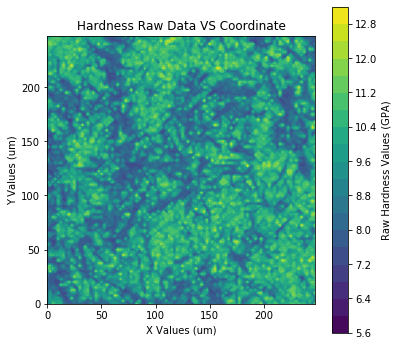

In [9]:
num_clusters = len(np.unique(hard_df))
if num_clusters > 20:
    num_clusters = 20
x_values = np.unique(x_df["Data"].values)
y_values = np.unique(y_df["Data"].values)
grid_size_x = int(x_values.size)
grid_size_y = int(y_values.size)
z_values = np.rot90(hard_df["Data"].values.reshape(grid_size_x, grid_size_y))

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_aspect('equal')
# Plots contour plot
cf = ax.contourf(x_values, y_values, z_values, num_clusters - 1)
# Plots color bar
cb = fig.colorbar(cf, ax=ax)
# Labels being set
cb.set_label("Raw Hardness Values (GPA)")
plt.title("Hardness Raw Data VS Coordinate")
plt.xlabel("X Values (um)")
plt.ylabel("Y Values (um)")

plt.show()

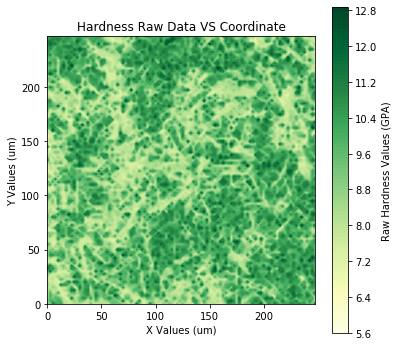

In [22]:
num_clusters = len(np.unique(hard_df))
if num_clusters > 20:
    num_clusters = 20
x_values = np.unique(x_df["Data"].values)
y_values = np.unique(y_df["Data"].values)
grid_size_x = int(x_values.size)
grid_size_y = int(y_values.size)
z_values = np.rot90(hard_df["Data"].values.reshape(grid_size_x, grid_size_y))

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_aspect('equal')
# Plots contour plot
cf = ax.contourf(x_values, y_values, z_values, 100, cmap="YlGn")
# Plots color bar
cb = fig.colorbar(cf, ax=ax)
# Labels being set
cb.set_label("Raw Hardness Values (GPA)")
plt.title("Hardness Raw Data VS Coordinate")
plt.xlabel("X Values (um)")
plt.ylabel("Y Values (um)")

plt.show()

In [23]:
print(hard_df["Data"].values.reshape(-1, 1))

[[10.47549057]
 [ 9.79098415]
 [11.01638031]
 ...
 [ 7.51258707]
 [ 8.06012535]
 [11.42922878]]


X Values: 
[  0.         2.524125   5.000625   7.52475   10.00125   12.525375
  15.001875  17.526     20.0025    22.526625  25.003124  27.52725
  30.00375   32.527874  35.004375  37.5285    40.005     42.529125
  45.005627  47.52975   50.00625   52.530376  55.006874  57.531
  60.0075    62.531624  65.008125  67.53225   70.00875   72.532875
  75.00938   77.5335    80.01      82.53413   85.01063   87.53475
  90.01125   92.53538   95.01187   97.536    100.0125   102.53663
 105.01312  107.53725  110.01375  112.53787  115.01437  117.5385
 120.015    122.53912  125.015625 127.53975  130.01625  132.54037
 135.01688  137.49338  140.0175   142.494    145.01813  147.49463
 150.01875  152.49525  155.01938  157.49588  160.02     162.4965
 165.02063  167.49713  170.02126  172.49776  175.02188  177.49838
 180.0225   182.499    185.02313  187.49962  190.02374  192.50024
 195.02437  197.50087  200.025    202.5015   205.02562  207.50212
 210.02625  212.50275  215.02687  217.50337  220.0275   222.504
 2

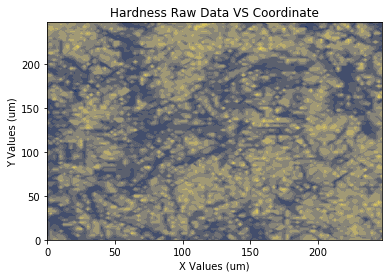

In [17]:
num_clusters = len(np.unique(hard_df))
if num_clusters > 20:
    num_clusters = 20
x_values = np.unique(x_df["Data"].values)
y_values = np.unique(y_df["Data"].values)
grid_size_x = int(x_values.size)
grid_size_y = int(y_values.size)
z_values = np.rot90(hard_df["Data"].values.reshape(grid_size_x, grid_size_y))

print("X Values: ")
print(x_values)
print("Y Values: ")
print(y_values)
print("Z Values: ")
print(z_values)

# Plots contour plot
plt.contourf(x_values, y_values, z_values, 10, cmap="cividis")
# Plots color bar
plt.colorbar(cf, ax=ax)
plt.title("Hardness Raw Data VS Coordinate")
plt.xlabel("X Values (um)")
plt.ylabel("Y Values (um)")

plt.show()

### Clustering the Data
In this step we are clustering the data based on some clustering methods. I used K Means but you are encouraged to use another clustering method. All the documentation for these methods can be found at the link below. These clustering methods are easy to use through the library provided. They should only be a single line for the clustering itself. You can then retrieve the clustered data through the labels_ attribute of the result of the clustering method.

    http://scikit-learn.org/stable/modules/clustering.html

In [12]:
k_means = KMeans(n_clusters=3, random_state=0).fit(hard_df.copy()["Data"].values.reshape(-1, 1))

k_means_results = k_means.labels_
clustered_df = pd.DataFrame(k_means_results)
clustered_df.columns = ["Data"]

### Visualizing Clustered Data Contour Plot
This step is the same as the visualization of the raw data except it is using the clustered data. The only difference is the data being used along with the labels.

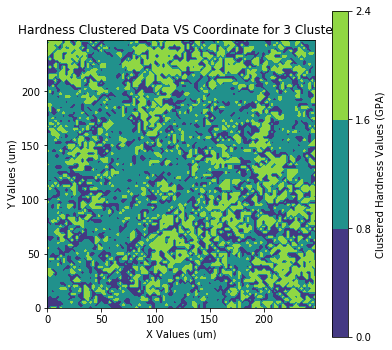

In [13]:
num_clusters = len(np.unique(clustered_df))
if num_clusters > 20:
    num_clusters = 20
x_values = np.unique(x_df["Data"].values)
y_values = np.unique(y_df["Data"].values)
grid_size_x = int(x_values.size)
grid_size_y = int(y_values.size)
z_values = np.rot90(clustered_df["Data"].values.reshape(grid_size_x, grid_size_y))

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_aspect('equal')
# Plots contour plot
cf = ax.contourf(x_values, y_values, z_values, num_clusters - 1)
# Plots color bar
cb = fig.colorbar(cf, ax=ax)
# Labels being set
cb.set_label("Clustered Hardness Values (GPA)")
plt.title("Hardness Clustered Data VS Coordinate for " + str(num_clusters) + " Clusters")
plt.xlabel("X Values (um)")
plt.ylabel("Y Values (um)")

plt.show()

### Clustering Data Distribution Visualization
For this we will be making a bar graph of the fraction of data inside of each cluster. This means that we need to calculate the percentage of data in each cluster and have each one of those percentages as a bar height.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

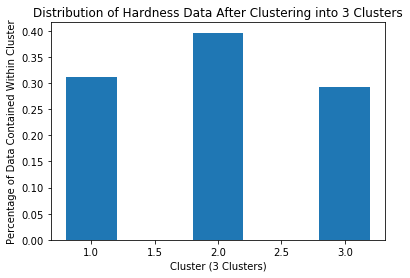

In [14]:
res_list = clustered_df["Data"].tolist()
cluster_fractions = []
cluster_num = []
unique_cluster_values = np.unique(clustered_df)
for i in unique_cluster_values:
    fraction = float(res_list.count(i)) / float(len(res_list))
    cluster_fractions.append(fraction)
    cluster_num.append(i + 1)
plt.bar(cluster_num, height=cluster_fractions, width=0.4)
plt.title("Distribution of Hardness Data After Clustering into " + str(len(cluster_num)) + " Clusters")
plt.xlabel("Cluster (" + str(len(cluster_num)) + " Clusters)")
plt.ylabel("Percentage of Data Contained Within Cluster")
plt.show()

# Wrap Up
In the section below describe how the clustering configuration you chose performed and why it performed the way it did. Important things to note are "This clustering method split the data into X clusters because ...", "The clusters had the distributions they did because...", and "This does / does not make sense according to what the clustering method does because ...".